In [1]:
import warnings
import matplotlib.pyplot as plt

from openap import top
import openap

warnings.filterwarnings("ignore")

## Specify flight information

Required: aircraft type, origin, destination, and take-off mass 

Take-off mass can be in kg, or fraction of maximum take-off mass

In [2]:
actype = "A320"
origin = "EHAM"
destination = "LGAV"
m0 = 0.85
m0 * 78

66.3

## Define trip type

- `top.CompleteFlight()`: full trajectory, non-phase specific
- `top.Multiphase()`: full trajectory, including climbing, cruise, and descent
- `top.Climb()`
- `top.Cruise()`
- `top.Descent()`

In [3]:
optimizer = top.CompleteFlight(actype, origin, destination, m0)
flight = optimizer.trajectory(objective="fuel")

You can visualize the trajectory quickly with the `vis.trajectory()` function

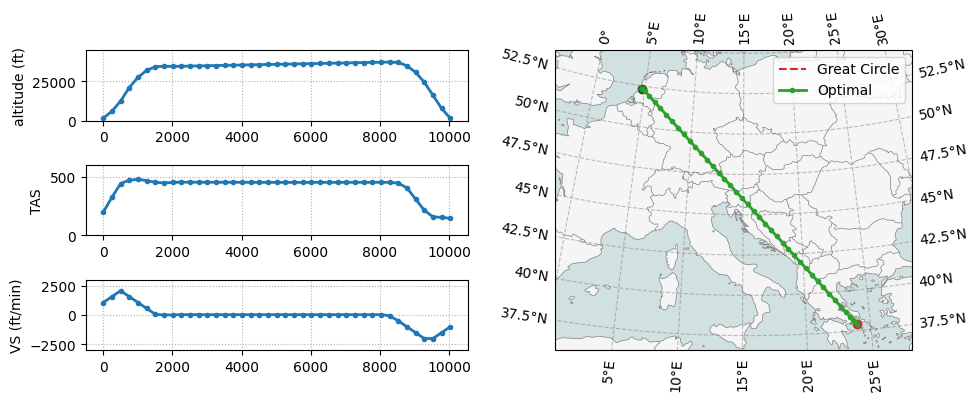

In [4]:
top.vis.trajectory(flight)
plt.show()

## Examples of different trajectories

### Multi-phase

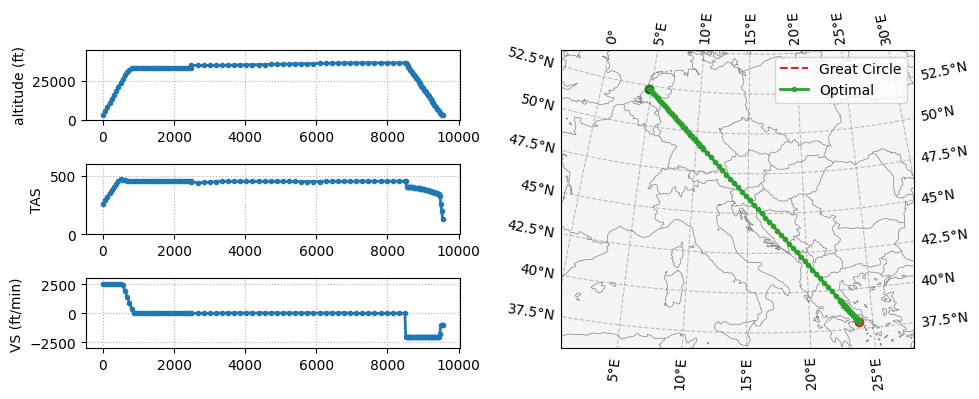

In [5]:
optimizer = top.MultiPhase(actype, origin, destination, m0)
flight = optimizer.trajectory(objective="fuel")

top.vis.trajectory(flight)
plt.show()

### Cruise phase only

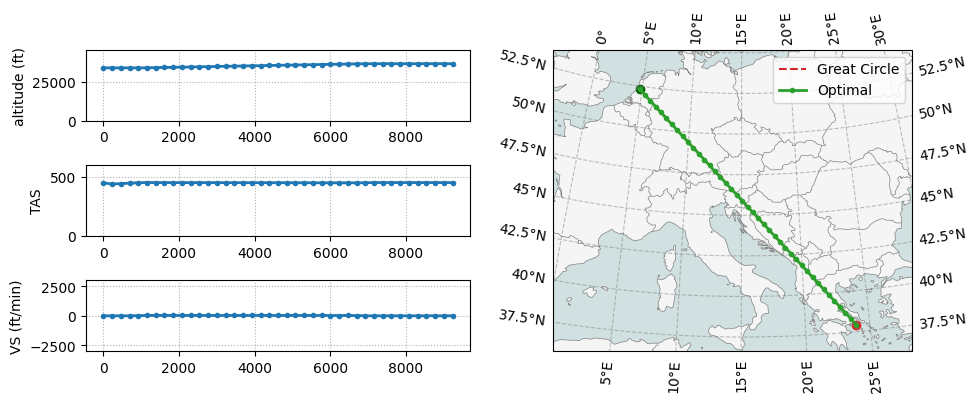

In [6]:
optimizer = top.Cruise(actype, origin, destination, m0)
flight = optimizer.trajectory(objective="fuel")

top.vis.trajectory(flight)
plt.show()

### Using different built-in objective functions

In [7]:
optimizer = top.CompleteFlight(actype, origin, destination, m0)

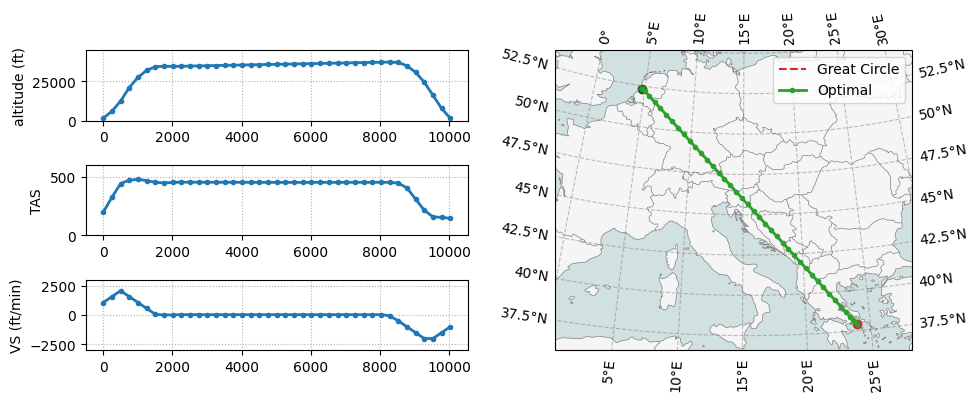

In [8]:
flight = optimizer.trajectory(objective="fuel")
top.vis.trajectory(flight)
plt.show()

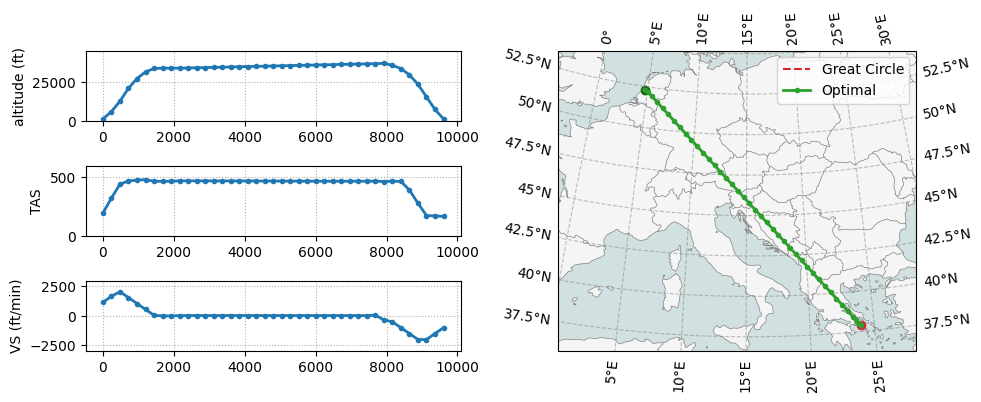

In [9]:
flight = optimizer.trajectory(objective="ci:60")
top.vis.trajectory(flight)
plt.show()

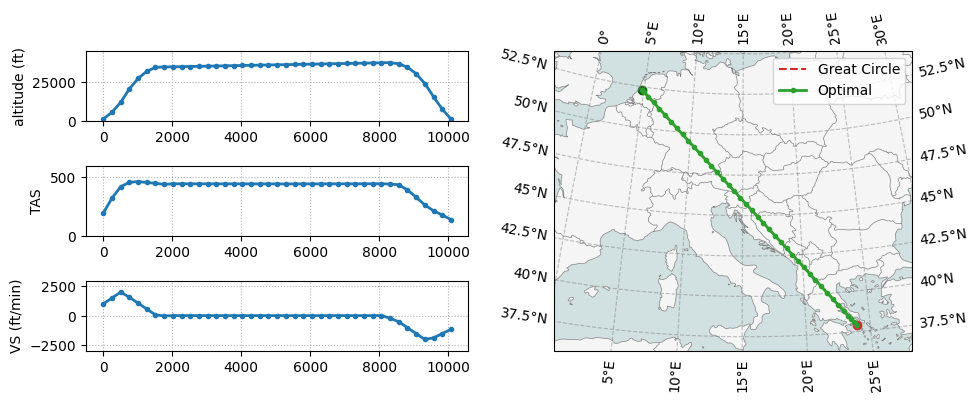

In [10]:
flight = optimizer.trajectory(objective="gwp100")
top.vis.trajectory(flight)
plt.show()

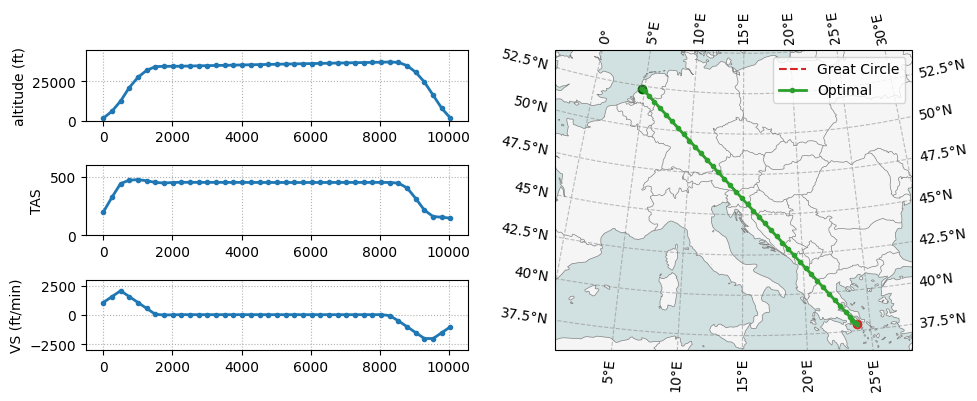

In [11]:
flight = optimizer.trajectory(objective="gtp100")
top.vis.trajectory(flight)
plt.show()

### Specify different objective functions for different phases

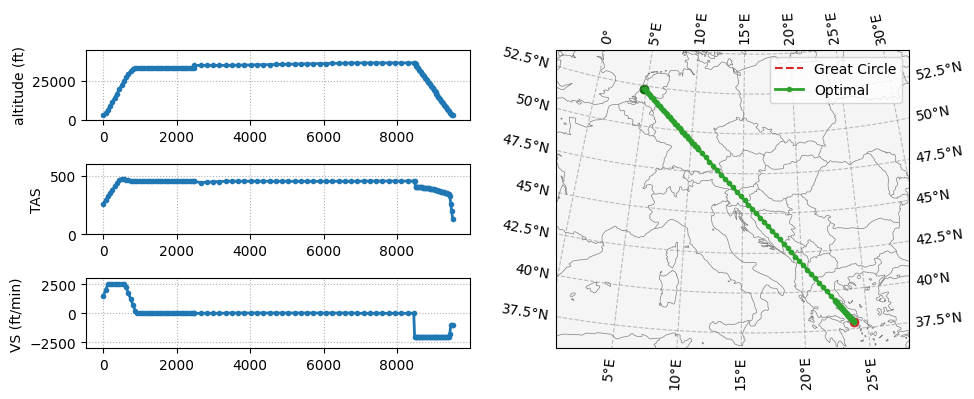

In [12]:
optimizer = top.MultiPhase(actype, origin, destination, m0)
flight = optimizer.trajectory(objective=("ci:60", "ci:10", "ci:20"))  # Multiphase
top.vis.trajectory(flight)
plt.show()